<a href="https://colab.research.google.com/github/anyazarembski/Projects/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook # 6

Name: Anya Zarembski
<br>Date: November 21st

# Problem Description: 
For this Notebook, we are attempting to use CNNs to diagnose pneumonia from pictures of chest x-rays. We can use pictures to run a model that learns which elements of any image have pneumonia and which don't. Images will either have pneunomia or they won't. 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import keras
import tensorflow 
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS167/datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS167/datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Baseline Model

In [ ]:
baseline = Sequential()
baseline.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3))) 
baseline.add(MaxPooling2D(pool_size=(2, 2)))
baseline.add(Conv2D(32, (3, 3), activation = 'relu'))
baseline.add(MaxPooling2D(pool_size=(2, 2)))
baseline.add(Flatten())
baseline.add(Dense(32))
baseline.add(Dense(1,activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)
baseline.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training_results = baseline.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=40, 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )

Epoch 1/40
163/163 [==============================] - 967s 6s/step - loss: 0.2792 - accuracy: 0.8823 - val_loss: 1.6786 - val_accuracy: 0.6394
Epoch 2/40
163/163 [==============================] - 19s 114ms/step - loss: 0.1903 - accuracy: 0.9248 - val_loss: 0.3744 - val_accuracy: 0.8333
Epoch 3/40
163/163 [==============================] - 19s 114ms/step - loss: 0.1532 - accuracy: 0.9402 - val_loss: 0.4783 - val_accuracy: 0.8077
Epoch 4/40
163/163 [==============================] - 19s 114ms/step - loss: 0.1289 - accuracy: 0.9509 - val_loss: 0.8000 - val_accuracy: 0.7468
Epoch 5/40
163/163 [==============================] - 19s 114ms/step - loss: 0.1200 - accuracy: 0.9561 - val_loss: 0.6583 - val_accuracy: 0.7692
Epoch 6/40
163/163 [==============================] - 19s 114ms/step - loss: 0.1125 - accuracy: 0.9548 - val_loss: 0.7576 - val_accuracy: 0.7500
Epoch 7/40
163/163 [==============================] - 19s 114ms/step - loss: 0.1175 - accuracy: 0.9540 - val_loss: 1.0543 - val_accu

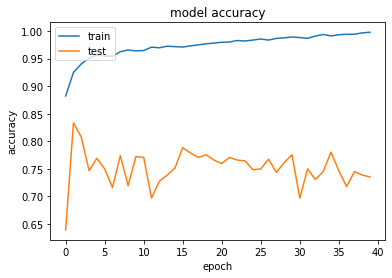

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tuned Model

In [ ]:
tuned = Sequential()
tuned.add(Conv2D(64, (5, 5), activation = 'relu', input_shape=(img_width, img_height, 3)))
tuned.add(MaxPooling2D(pool_size=(2, 2), data_format = 'channels_first'))
tuned.add(Conv2D(64, (5, 5), activation = 'relu', padding = 'same'))
tuned.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
tuned.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
tuned.add(MaxPooling2D(pool_size=(2, 2)))
tuned.add(Flatten()) 
tuned.add(Dense(32)) 
tuned.add(Dense(1,activation='sigmoid'))

opt = SGD(nesterov=True, lr=0.001, momentum=0.3)
tuned.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training_results = tuned.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=40, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/40
163/163 [==============================] - 28s 173ms/step - loss: 0.1965 - accuracy: 0.9216 - val_loss: 0.9666 - val_accuracy: 0.6843
Epoch 2/40
163/163 [==============================] - 28s 172ms/step - loss: 0.1773 - accuracy: 0.9296 - val_loss: 0.5386 - val_accuracy: 0.7692
Epoch 3/40
163/163 [==============================] - 28s 172ms/step - loss: 0.1599 - accuracy: 0.9365 - val_loss: 0.4602 - val_accuracy: 0.7981
Epoch 4/40
163/163 [==============================] - 28s 171ms/step - loss: 0.1514 - accuracy: 0.9419 - val_loss: 0.3837 - val_accuracy: 0.8269
Epoch 5/40
163/163 [==============================] - 28s 171ms/step - loss: 0.1575 - accuracy: 0.9369 - val_loss: 0.5401 - val_accuracy: 0.7804
Epoch 6/40
163/163 [==============================] - 28s 171ms/step - loss: 0.1401 - accuracy: 0.9457 - val_loss: 1.3624 - val_accuracy: 0.6731
Epoch 7/40
163/163 [==============================] - 28s 171ms/step - loss: 0.1430 - accuracy: 0.9454 - val_loss: 0.9983 - val_ac

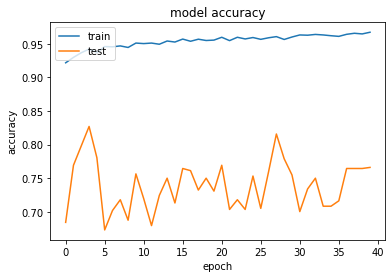

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusions
Honestly, I think both performed equally as well on average. I tried the tuned model with several different parameters and after a few hours of waiting for my model to run, adjusting, and trying again, I decided that it wasn't going to get much better than what I had without more in-depth knowledge of how these actually work so I could make educated changes, rather then guessing and checking. I couldn't figure how to increase accuracy, as no matter what parameters I changed, it seemed to be so variable throughout the model.